In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder

In [2]:
with open('C:/Users/Shahariar Niloy/Desktop/hp.txt') as f:
    lines = f.readlines()

In [3]:
listToStr = ' '.join([str(elem) for elem in lines])

In [4]:
listToStr

'Harry Potter and the Sorcerer\'s Stone\n \n \n CHAPTER ONE\n \n THE BOY WHO LIVED\n \n Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\n that they were perfectly normal, thank you very much. They were the last\n people you\'d expect to be involved in anything strange or mysterious,\n because they just didn\'t hold with such nonsense.\n \n Mr. Dursley was the director of a firm called Grunnings, which made\n drills. He was a big, beefy man with hardly any neck, although he did\n have a very large mustache. Mrs. Dursley was thin and blonde and had\n nearly twice the usual amount of neck, which came in very useful as she\n spent so much of her time craning over garden fences, spying on the\n neighbors. The Dursleys had a small son called Dudley and in their\n opinion there was no finer boy anywhere.\n \n The Dursleys had everything they wanted, but they also had a secret, and\n their greatest fear was that somebody would discover it. They didn\'t\n think they could 

In [5]:
lower = listToStr.lower()

In [6]:
disallowed_characters = ".,\'-"
for character in disallowed_characters:
	new = lower.replace(character, " ")
    
new = new.translate({ ord(c): None for c in "'.," })

In [7]:
new = new.translate({ ord(c): None for c in '\n"' })

In [8]:
new

'harry potter and the sorcerers stone   chapter one  the boy who lived  mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense  mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere  the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they didnt think they could bear it if anyone found out about the potters mrs potter was mrs dursleys s

In [9]:
newlist = new.split()

In [10]:
check = ['harry','ron','hagrid','hermione']
data = []
for x in newlist:
  if x in check:
    data.append(x)

In [23]:
data

['harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'hagrid',
 'hagrid',
 'hagrid',
 'hagrid',
 'harry',
 'hagrid',
 'harry',
 'hagrid',
 'hagrid',
 'harry',
 'hagrid',
 'hagrid',
 'harry',
 'hagrid',
 'hagrid',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',
 'harry',

In [11]:
le = LabelEncoder()
newdata = le.fit_transform(data)
changes_dict = {index: label for index, label in enumerate(le.classes_)}

In [12]:
newdata

array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

In [22]:
newdata.shape

(2166,)

In [13]:
changes_dict

{0: 'hagrid', 1: 'harry', 2: 'hermione', 3: 'ron'}

In [14]:
def transition_matrix(transitions):
    n = 1+ max(transitions)

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

m = transition_matrix(newdata)
matrix = []
for row in m:
     matrix.append(' '.join('{0:.2f}'.format(x) for x in row))

In [15]:
matrix

['0.34 0.54 0.05 0.07',
 '0.14 0.57 0.08 0.20',
 '0.08 0.53 0.12 0.26',
 '0.05 0.50 0.26 0.19']

In [16]:
newarr = np.array([])
for i in range(len(matrix)):
    lst = matrix[i].split()
    arr = np.asarray(lst, dtype = float)
    newarr = np.concatenate(([newarr,arr]))

In [17]:
arr_2d = np.reshape(newarr, (4, 4))

In [18]:
arr_2d

array([[0.34, 0.54, 0.05, 0.07],
       [0.14, 0.57, 0.08, 0.2 ],
       [0.08, 0.53, 0.12, 0.26],
       [0.05, 0.5 , 0.26, 0.19]])

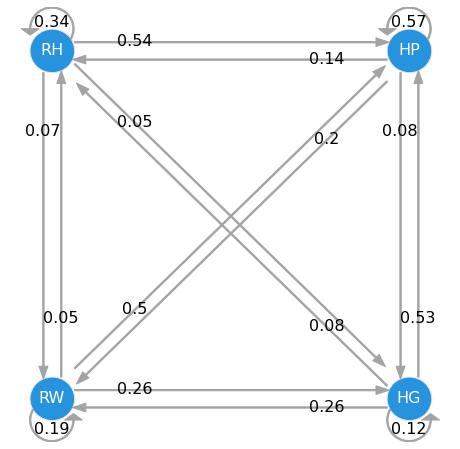

In [19]:
import matplotlib.pyplot as plt
from markovchain import MarkovChain

mc = MarkovChain(arr_2d, ['RH','HP','HG','RW'])  #RH: Rubeus Hagrid HP: Harry Potter HG: Hermione Granger RW: Ronald Wisley
mc.draw("markovchain.png")

In [20]:
random_walk = []
random_walk_state = []
for i in range(5):
    rndlist = random.choices(check, k=random.randint(50, 100))
    rndstr =  '-> '.join([str(elem) for elem in rndlist])
    random_walk.append(rndstr)
    random_walk_state.append(len(rndlist))

In [21]:
for i in range(5):
    print("Random Walk of ->",random_walk_state[i],"<- state")
    print(random_walk[i])
    print("\n")

Random Walk of -> 98 <- state
hagrid-> ron-> ron-> harry-> hermione-> hagrid-> hermione-> hagrid-> hermione-> hagrid-> ron-> ron-> hagrid-> hermione-> hermione-> hermione-> ron-> ron-> hermione-> hagrid-> ron-> hermione-> ron-> hagrid-> hagrid-> ron-> ron-> hagrid-> harry-> harry-> harry-> hagrid-> ron-> hagrid-> ron-> hagrid-> ron-> harry-> harry-> hermione-> ron-> ron-> hermione-> ron-> ron-> harry-> hermione-> hagrid-> ron-> hagrid-> ron-> hagrid-> hagrid-> hagrid-> hermione-> harry-> ron-> harry-> hermione-> harry-> hermione-> harry-> hermione-> harry-> hagrid-> hagrid-> hagrid-> harry-> hagrid-> harry-> hagrid-> ron-> hermione-> ron-> hagrid-> hermione-> hagrid-> hagrid-> harry-> ron-> ron-> hagrid-> hagrid-> hermione-> hagrid-> ron-> hermione-> hermione-> ron-> harry-> ron-> hermione-> hagrid-> hermione-> hagrid-> harry-> hermione-> harry


Random Walk of -> 88 <- state
harry-> hagrid-> hagrid-> hagrid-> hermione-> hagrid-> hermione-> hagrid-> hagrid-> hermione-> harry-> hagrid->